In [9]:
import pandas as pd  #pandas用于数据清洗
import numpy as np  #numpy用于矩阵运算
import matplotlib.pyplot as plt  #matplotlib用于作图，分析数据
import seaborn as sns  #seaborn用于高级作图，数据可视化
import re  #python中的正则表达式包
import patsy
import statsmodels.api as sm

from matplotlib.font_manager import FontProperties  #用于为matplotlib设置中文字体

机器学习 负责人：孙川

In [10]:
#为seaborn设置中文字体，没有下面两行的话seaborn和matplotlib作图不能显示中文
#mfont = FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf', size=14)
#sns.set(font = mfont.get_name())

expances_data = pd.read_csv('ml_data')
expances_data = expances_data.drop('userid', axis=1)
expances_data.loc[:, '年龄段'] = expances_data['年龄段'].astype(int)

In [11]:
#使用透视图或分组分析多个变量之间的关系
#expances_data.pivot_table('近1年消费总笔数', '消费城市数量', '年龄段',  aggfunc='mean')

In [12]:
#f = '中间报价 ~ 性别 + 年龄段 + 借记卡数 + 贷记卡数 + 近1年单笔交易金额最大值 + 近1年消费总笔数 + 近1年消费总金额 + 消费城市数量'
f = '中间报价 ~ 性别'
y, X = patsy.dmatrices(f, expances_data, return_type='dataframe')

results = sm.OLS(y, X).fit()
#print(results.summary())

y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X, y, 'o', label='data')
ax.plot(X, y_fitted, 'r--.',label='OLS')

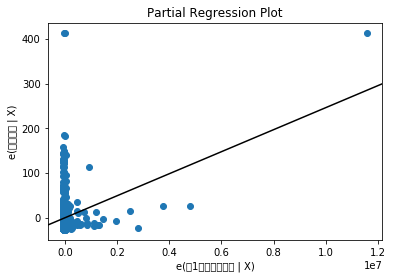

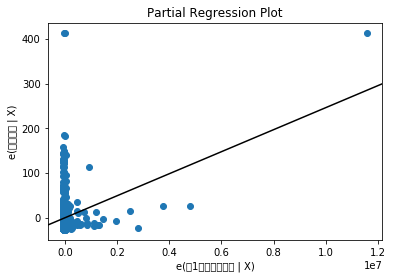

In [13]:
sm.graphics.plot_partregress('中间报价', '近1年消费总金额', ['性别', '年龄段'], data=expances_data, obs_labels=False)

In [18]:
expances = pd.read_csv('ml_data_cleaned')
expances = expances.drop('userid', axis=1)
expances.loc[:, '年龄段'] = expances['年龄段'].astype(int)
expances = expances.drop('近1年单笔交易金额最大值', axis=1)

f = '中间报价 ~ 性别 + 年龄段 + 借记卡数 + 贷记卡数 + 近1年单笔交易金额最大值 + 近1年消费总笔数 + 近1年消费总金额 + 消费城市数量'
#f = '中间报价 ~ 性别'
y, X = patsy.dmatrices(f, expances, return_type='dataframe')

results = sm.OLS(y, X).fit()
print(results.summary())

In [4]:
#sm.graphics.plot_partregress('中间报价', '近1年消费总金额', ['性别', '年龄段'], data=expances, obs_labels=False)

In [17]:
X = expances.iloc[:, 1:].values
y = expances.iloc[:, 0].values